In [64]:
import pandas as pd
import nltk
from matplotlib import pyplot as plt
# for tokenizing
nltk.download('punkt_tab')
# for POS_tagging
nltk.download('averaged_perceptron_tagger_eng')
# for named entity recognition
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [66]:
df=pd.read_json('/content/drive/MyDrive/All_Beauty.jsonl', lines=True)

In [3]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


In [67]:
# df.index
df.shape

(701528, 10)

# Data Preprocessing

In [5]:
df.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

### dropping columns

In [6]:
df=df.drop(columns=['asin','parent_asin','images'])

In [7]:
df.head()

,rating,title,text,user_id,timestamp,helpful_vote,verified_purchase
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True
2,5,Yes!,"Smells good, feels great!",AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True
3,1,Synthetic feeling,Felt synthetic,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True
4,5,A+,Love it,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True


### reordering columns

In [69]:
column_order=['user_id','timestamp','rating','verified_purchase','title','text','helpful_vote']
df=df[column_order]

In [9]:
df.head()

,user_id,timestamp,rating,verified_purchase,title,text,helpful_vote
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,5,True,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,0
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,4,True,Works great but smells a little weird.,"This product does what I need it to do, I just...",1
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,5,True,Yes!,"Smells good, feels great!",2
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,1,True,Synthetic feeling,Felt synthetic,0
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,5,True,A+,Love it,0


In [10]:
df.shape

(701528, 7)

### Reducing size of Data frame

In [70]:
df=df.head(5000)
print(df.shape)

(5000, 7)


In [12]:
df['rating'].value_counts()

,count
rating,
5,2864
4,1000
3,500
1,360
2,276


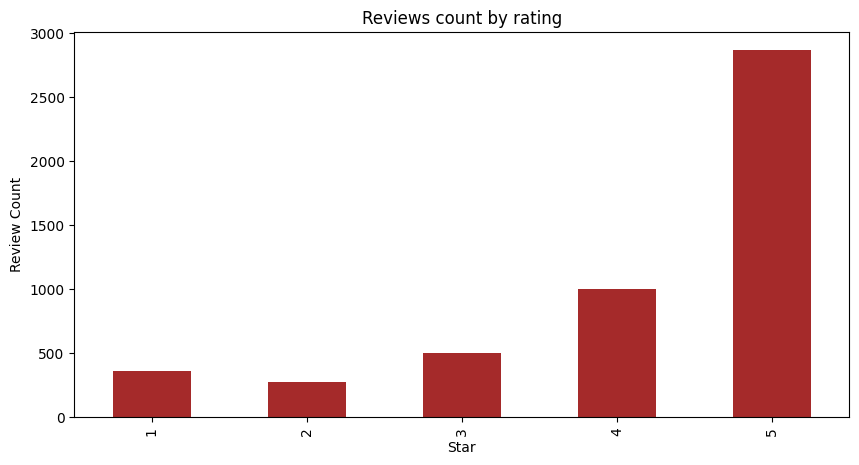

In [13]:
ax=df['rating'].value_counts().sort_index().plot(kind='bar', title='Reviews count by rating', figsize=(10,5), xlabel='Star', ylabel='Review Count', color='brown')
# plt.show(ax)

In [14]:
# df['text'][10]
df['text'].values[10]

"I was very disappointed when I got this facial scrub. I had assumed it was like other scrubs I use but it wasn't. This is a powder which you need to mix with water to make a paste before you put it on your face. I have a tendency to like to use scrubs in the shower with me, so this extra step doesn't really work for me. As far as the scrubbing factor goes, it's ok. I didn't feel a real smoothing or softening of my skin after use the way I have with others. The biggest plus is the fragrance (i love the smell of oranges). I won't be repurchasing."

### Tokenizing

In [15]:
example=df['text'].values[10]
print(example)

I was very disappointed when I got this facial scrub. I had assumed it was like other scrubs I use but it wasn't. This is a powder which you need to mix with water to make a paste before you put it on your face. I have a tendency to like to use scrubs in the shower with me, so this extra step doesn't really work for me. As far as the scrubbing factor goes, it's ok. I didn't feel a real smoothing or softening of my skin after use the way I have with others. The biggest plus is the fragrance (i love the smell of oranges). I won't be repurchasing.


In [16]:
tokens=nltk.word_tokenize(example)
# print(tokens)
tokens[:10] #First 10 tokens

['I',
 'was',
 'very',
 'disappointed',
 'when',
 'I',
 'got',
 'this',
 'facial',
 'scrub']

### POS tagging

In [17]:
tagg=nltk.pos_tag(tokens)
print(tagg)

[('I', 'PRP'), ('was', 'VBD'), ('very', 'RB'), ('disappointed', 'JJ'), ('when', 'WRB'), ('I', 'PRP'), ('got', 'VBD'), ('this', 'DT'), ('facial', 'JJ'), ('scrub', 'NN'), ('.', '.'), ('I', 'PRP'), ('had', 'VBD'), ('assumed', 'VBN'), ('it', 'PRP'), ('was', 'VBD'), ('like', 'IN'), ('other', 'JJ'), ('scrubs', 'NN'), ('I', 'PRP'), ('use', 'VBP'), ('but', 'CC'), ('it', 'PRP'), ('was', 'VBD'), ("n't", 'RB'), ('.', '.'), ('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('powder', 'NN'), ('which', 'WDT'), ('you', 'PRP'), ('need', 'VBP'), ('to', 'TO'), ('mix', 'VB'), ('with', 'IN'), ('water', 'NN'), ('to', 'TO'), ('make', 'VB'), ('a', 'DT'), ('paste', 'NN'), ('before', 'IN'), ('you', 'PRP'), ('put', 'VBP'), ('it', 'PRP'), ('on', 'IN'), ('your', 'PRP$'), ('face', 'NN'), ('.', '.'), ('I', 'PRP'), ('have', 'VBP'), ('a', 'DT'), ('tendency', 'NN'), ('to', 'TO'), ('like', 'VB'), ('to', 'TO'), ('use', 'VB'), ('scrubs', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('shower', 'NN'), ('with', 'IN'), ('me', 'PRP'), (','

### Named Entity recognition

In [18]:
entities=nltk.chunk.ne_chunk(tagg)
# for pretty print
entities.pprint()

(S
  I/PRP
  was/VBD
  very/RB
  disappointed/JJ
  when/WRB
  I/PRP
  got/VBD
  this/DT
  facial/JJ
  scrub/NN
  ./.
  I/PRP
  had/VBD
  assumed/VBN
  it/PRP
  was/VBD
  like/IN
  other/JJ
  scrubs/NN
  I/PRP
  use/VBP
  but/CC
  it/PRP
  was/VBD
  n't/RB
  ./.
  This/DT
  is/VBZ
  a/DT
  powder/NN
  which/WDT
  you/PRP
  need/VBP
  to/TO
  mix/VB
  with/IN
  water/NN
  to/TO
  make/VB
  a/DT
  paste/NN
  before/IN
  you/PRP
  put/VBP
  it/PRP
  on/IN
  your/PRP$
  face/NN
  ./.
  I/PRP
  have/VBP
  a/DT
  tendency/NN
  to/TO
  like/VB
  to/TO
  use/VB
  scrubs/NNS
  in/IN
  the/DT
  shower/NN
  with/IN
  me/PRP
  ,/,
  so/RB
  this/DT
  extra/JJ
  step/NN
  does/VBZ
  n't/RB
  really/RB
  work/VB
  for/IN
  me/PRP
  ./.
  As/RB
  far/RB
  as/IN
  the/DT
  scrubbing/VBG
  factor/NN
  goes/VBZ
  ,/,
  it/PRP
  's/VBZ
  ok/JJ
  ./.
  I/PRP
  did/VBD
  n't/RB
  feel/VB
  a/DT
  real/JJ
  smoothing/NN
  or/CC
  softening/NN
  of/IN
  my/PRP$
  skin/NN
  after/IN
  use/IN
  the/DT
  way/NN


# VADER
# a rule based tehcnique

In [71]:
# Sentiment analyzer tool of nltk library
from nltk.sentiment import SentimentIntensityAnalyzer
# vader_lexicon is the pre-built dictionary used by VADER
nltk.download('vader_lexicon')


# library allowing you to visualize the progress of iterations in a loop.
from tqdm.notebook import tqdm

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [20]:
sia=SentimentIntensityAnalyzer()
# SEI object

In [21]:
# Polarity Score fucntion
sia.polarity_scores('I am lonly, I miss home')

{'neg': 0.348, 'neu': 0.652, 'pos': 0.0, 'compound': -0.1531}

In [22]:
print(example)
sia.polarity_scores(example)

I was very disappointed when I got this facial scrub. I had assumed it was like other scrubs I use but it wasn't. This is a powder which you need to mix with water to make a paste before you put it on your face. I have a tendency to like to use scrubs in the shower with me, so this extra step doesn't really work for me. As far as the scrubbing factor goes, it's ok. I didn't feel a real smoothing or softening of my skin after use the way I have with others. The biggest plus is the fragrance (i love the smell of oranges). I won't be repurchasing.


{'neg': 0.02, 'neu': 0.857, 'pos': 0.123, 'compound': 0.9082}

### Loop to iterate over all the reviews


In [23]:
# .iterrows() to iterate over the rows
# initialising a empty dictionary to store scores
result={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  text=row['text']
  myid=row['user_id']
  result[myid]=sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [24]:
pd.DataFrame(result).T

,neg,neu,pos,compound
AGKHLEW2SOWHNMFQIJGBECAF7INQ,0.000,0.842,0.158,0.7430
AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,0.000,0.215,0.785,0.8070
AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0.000,0.192,0.808,0.6369
AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,0.000,1.000,0.000,0.0000
AHREXOGQPZDA6354MHH4ETSF3MCQ,0.074,0.609,0.316,0.8458
...,...,...,...,...
AFYMQ26XEHPYRKVSLV6LL5JMUMTQ,0.000,0.899,0.101,0.5574
AHOB2W6BQVLZTLHNJNSU5VW2RWHQ,0.000,1.000,0.000,0.0000
AFCXAFHH57IND5EZAADQVJHGI5ZA,0.000,1.000,0.000,0.0000
AFUZCVGYFFXNRJXEGVNFNOT7KAAQ,0.108,0.394,0.498,0.8360


In [25]:
# vaders=pd.DataFrame(result)
vaders=pd.DataFrame(result).T
vaders=vaders.reset_index().rename(columns=({'index':'user_id'}))
vaders.head()
# vaders=vaders.merge(df, how='left')

,user_id,neg,neu,pos,compound
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0.000,0.842,0.158,0.7430
1,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,0.000,0.215,0.785,0.8070
2,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0.000,0.192,0.808,0.6369
3,AGMJ3EMDVL6OWBJF7CA5RGJLXN5A,0.000,1.000,0.000,0.0000
4,AHREXOGQPZDA6354MHH4ETSF3MCQ,0.074,0.609,0.316,0.8458


In [26]:
vaders=vaders.merge(df, how='left')
vaders.head()

,user_id,neg,neu,pos,compound,timestamp,rating,verified_purchase,title,text,helpful_vote
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0.0,0.842,0.158,0.7430,2020-05-05 14:08:48.923,5,True,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,0
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0.0,0.842,0.158,0.7430,2020-05-04 18:10:55.070,4,True,Works great but smells a little weird.,"This product does what I need it to do, I just...",1
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,0.0,0.215,0.785,0.8070,2020-05-16 21:41:06.052,5,True,Yes!,"Smells good, feels great!",2
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0.0,0.192,0.808,0.6369,2022-01-28 18:13:50.220,1,True,Synthetic feeling,Felt synthetic,0
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0.0,0.192,0.808,0.6369,2020-12-30 10:02:43.534,5,True,A+,Love it,0


#Visualisng result of rule based technique


In [27]:
import seaborn as sns

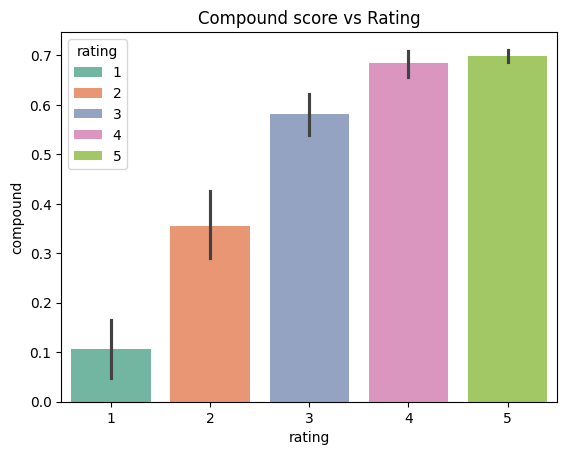

In [44]:
# palette is argument in Seaborn used to specify the color palette for a plot
ax=sns.barplot(data=vaders, x='rating', y='compound', hue='rating', palette="Set2")
ax.set_title('Compound score vs Rating')
plt.show()


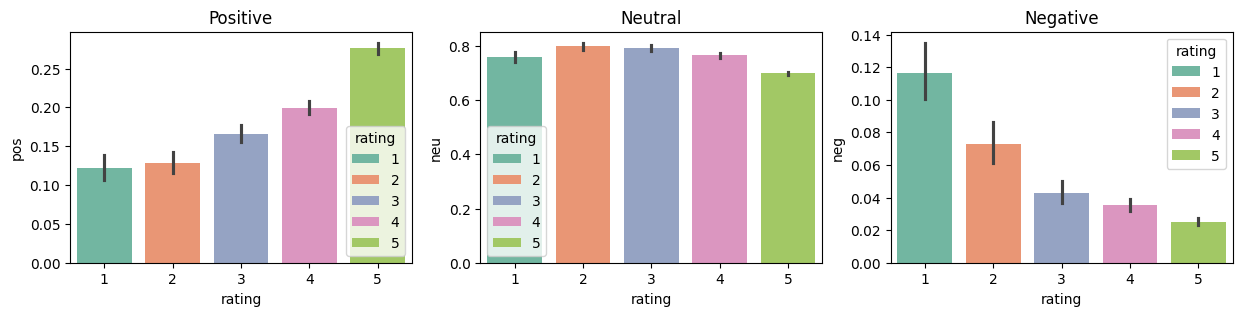

In [46]:
fig, axs=plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0], hue='rating', palette="Set2")
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1], hue='rating', palette="Set2")
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2], hue='rating', palette="Set2")
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
# plt.tight_layout()
plt.show()

# Deel Learning based model roBERTa

In [30]:
#  to automatically load the appropriate tokenizer for the specified model.
from transformers import AutoTokenizer
# loading pre-trained model specialized in sequence classification tasks, like sentiment analysis
from transformers import AutoModelForSequenceClassification
# Softmax converts raw model outputs to represent a probability distribution
from scipy.special import softmax

In [31]:
# pre-trained RoBERTa model fine-tuned on Twitter data for sentiment analysis
Model=f'cardiffnlp/twitter-roberta-base-sentiment'
# loading suitable tokenizer for the model automaticaly
tokenizer=AutoTokenizer.from_pretrained(Model)
# Loads the pre-trained RoBERTa model for sequence classification with specific weights
model=AutoModelForSequenceClassification.from_pretrained(Model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [32]:
print(example)

I was very disappointed when I got this facial scrub. I had assumed it was like other scrubs I use but it wasn't. This is a powder which you need to mix with water to make a paste before you put it on your face. I have a tendency to like to use scrubs in the shower with me, so this extra step doesn't really work for me. As far as the scrubbing factor goes, it's ok. I didn't feel a real smoothing or softening of my skin after use the way I have with others. The biggest plus is the fragrance (i love the smell of oranges). I won't be repurchasing.


In [33]:
text_encoding=tokenizer(example, return_tensors='pt')
# text_encodeing

In [34]:
output=model(**text_encoding)
result=output[0][0].detach().numpy()
result=softmax(result)
result

array([0.42989305, 0.37568504, 0.19442184], dtype=float32)

In [35]:
# dictionary for result
result_dict={
    'roBERTa_neg':result[0],
    'roBERTa_neu':result[1],
    'roBERTa_pos':result[2]
}

## Example results of both technique

In [36]:
print(result_dict)

{'roBERTa_neg': 0.42989305, 'roBERTa_neu': 0.37568504, 'roBERTa_pos': 0.19442184}


In [37]:
sia.polarity_scores(example)

{'neg': 0.02, 'neu': 0.857, 'pos': 0.123, 'compound': 0.9082}

In [38]:
# Function to calculate Scores from roBERTa
def polarity_scores_roberta(example):
  text_encoding=tokenizer(example, return_tensors='pt')
  output=model(**text_encoding)
  result=output[0][0].detach().numpy()
  result=softmax(result)
  result_dict={
    'roBERTa_neg':result[0],
    'roBERTa_neu':result[1],
    'roBERTa_pos':result[2]
  }
  return result_dict



In [39]:
# merged result dict
# merged_result= vader_result | roberta_result
# print(merged_result)

## Loop to iterate over all the reviews


In [40]:
result={}
for i, row in tqdm(df.iterrows(), total=len(df)):
  try:
    text=row['text']
    myid=row['user_id']

    vader_result=sia.polarity_scores(text)

    roberta_result=polarity_scores_roberta(text)

    merged_result= vader_result | roberta_result

    result[myid]=merged_result

  except RuntimeError:
    print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id AFXF3EGQTQDXMRLDWFU7UBFQZB7Q
Broke for id AFXF3EGQTQDXMRLDWFU7UBFQZB7Q
Broke for id AEIPJBAN7A55Q5DFFPZSR2UV3OKA
Broke for id AEIPJBAN7A55Q5DFFPZSR2UV3OKA
Broke for id AFWVN52MRBWOTIK7UGXBWGOY4HBA
Broke for id AFLX66DKF6R3H6OEOC3TIVAYXZIQ
Broke for id AGAM2CCKV52HI4YZU7ASZTSXA7YQ
Broke for id AGAM2CCKV52HI4YZU7ASZTSXA7YQ
Broke for id AFERCDY2EFJKT7QUQ75GISNHTFOQ
Broke for id AGTMZCWIWBH43TCW7UKG2YV2EKKA
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763ZHZRXC4A
Broke for id AF2BLE54TEMGZ546U763Z

### broke for too long reviews

In [42]:
result_df=pd.DataFrame(result).T
result_df=result_df.reset_index().rename(columns=({'index':'user_id'}))
result_df=result_df.merge(df, how='left')
result_df.head()

,user_id,neg,neu,pos,compound,roBERTa_neg,roBERTa_neu,roBERTa_pos,timestamp,rating,verified_purchase,title,text,helpful_vote
0,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0.0,0.842,0.158,0.7430,0.570795,0.331902,0.097303,2020-05-05 14:08:48.923,5,True,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,0
1,AGKHLEW2SOWHNMFQIJGBECAF7INQ,0.0,0.842,0.158,0.7430,0.570795,0.331902,0.097303,2020-05-04 18:10:55.070,4,True,Works great but smells a little weird.,"This product does what I need it to do, I just...",1
2,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,0.0,0.215,0.785,0.8070,0.001404,0.009794,0.988802,2020-05-16 21:41:06.052,5,True,Yes!,"Smells good, feels great!",2
3,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0.0,0.192,0.808,0.6369,0.014571,0.064903,0.920526,2022-01-28 18:13:50.220,1,True,Synthetic feeling,Felt synthetic,0
4,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,0.0,0.192,0.808,0.6369,0.014571,0.064903,0.920526,2020-12-30 10:02:43.534,5,True,A+,Love it,0


# Results from roBERTa


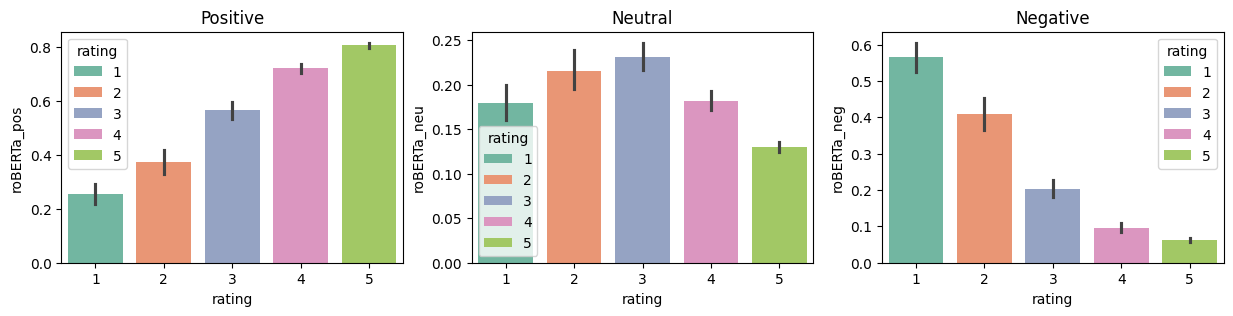

In [47]:
fig, axs=plt.subplots(1,3,figsize=(15,3))
sns.barplot(data=result_df, x='rating', y='roBERTa_pos', ax=axs[0], hue='rating', palette="Set2")
sns.barplot(data=result_df, x='rating', y='roBERTa_neu', ax=axs[1], hue='rating', palette="Set2")
sns.barplot(data=result_df, x='rating', y='roBERTa_neg', ax=axs[2], hue='rating', palette="Set2")
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
# plt.tight_layout()
plt.show()

# Comparing results of both technique

In [48]:
result_df.columns

Index(['user_id', 'neg', 'neu', 'pos', 'compound', 'roBERTa_neg',
       'roBERTa_neu', 'roBERTa_pos', 'timestamp', 'rating',
       'verified_purchase', 'title', 'text', 'helpful_vote'],
      dtype='object')

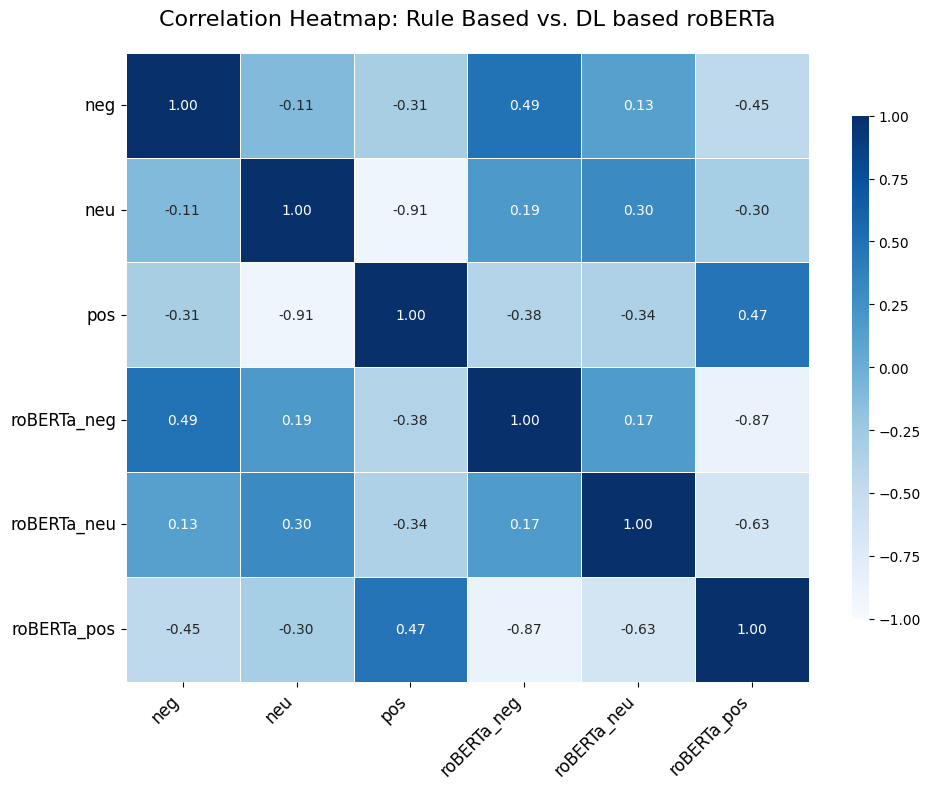

In [72]:
# Select only the relevant columns for correlation analysis
# columns = ['neg', 'neu', 'pos', 'roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos']
# corr_matrix = result_df[columns].corr()

corr_matrix = result_df[[
    'neg', 'neu', 'pos', 'roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos'
    ]].corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Plot the heatmap with improved aesthetics
sns.heatmap(
    corr_matrix,
    annot=True,         # Show correlation values
    fmt=".2f",          # Format the annotations to 2 decimal places
    cmap="Blues",      # A more visually pleasing colormap
    vmin=-1, vmax=1,    # Correlation ranges from -1 to 1
    linewidths=0.5,     # Add gridlines between cells
    cbar_kws={"shrink": 0.8, "aspect": 30},  # Customize color bar
)

# Add titles and labels
plt.title("Correlation Heatmap: Rule Based vs. DL based roBERTa", fontsize=16, pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")  # Rotate and align x-axis labels
plt.yticks(fontsize=12, rotation=0)              # Keep y-axis labels horizontal
plt.tight_layout()

# Show the heatmap
plt.show()


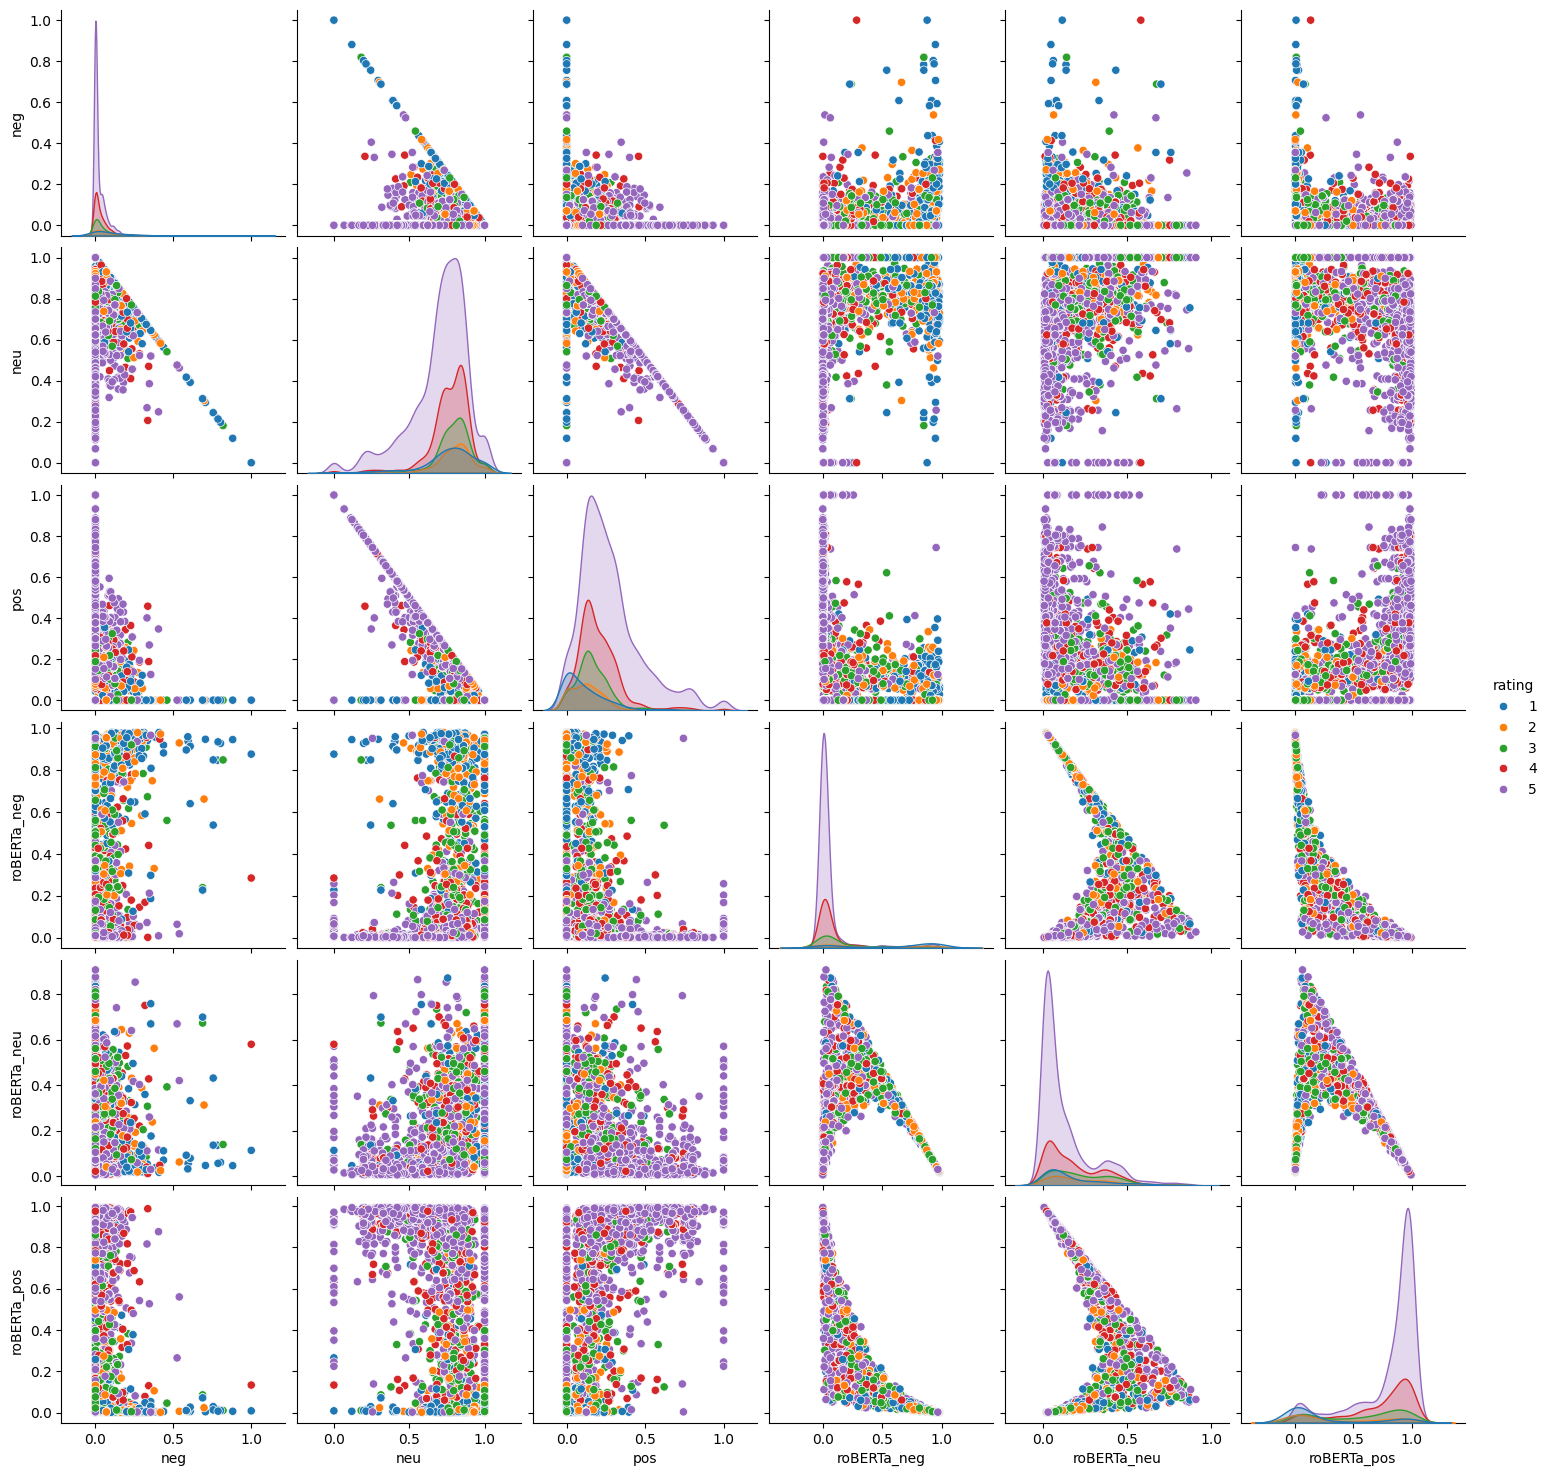

In [57]:
sns.pairplot(data=result_df,
             vars=['neg', 'neu', 'pos', 'roBERTa_neg', 'roBERTa_neu', 'roBERTa_pos'],
             hue='rating',
             palette='tab10')
plt.show()

# Let's check the **5** star review that has highest **negative** rating in both models

In [62]:
result_df.query('rating==5').sort_values('roBERTa_neg', ascending=False)['text'].values[0]

'I was very satisfied upon opening this wig.  It looks real.  It feels real.  It is so light and cool for summer wear.  I think the part I love the most about it is the fact that the cut and style are foolproof-not a lot of styling on this wig to get the result.  Even for a synthetic wig, it is so natural looking, and the cap fits to the scalp nicely.  This wig is my new go to wig for everyday wear.  I have received so many compliments and I am so pleased with the results!'

In [63]:
result_df.query('rating==5').sort_values('neg', ascending=False)['text'].values[0]

'Work great for eyewear, phone screens, and flashlight lens.'